In [1]:
%run model.ipynb

In [58]:
from matplotlib.lines import Line2D
import pickle

In [3]:
problems = load_problems("/Users/simonhusebo/Dokumenter/MASTERS CODE/data")
problem_types = ['16_4_4', '30_5_7','42_7_10','72_9_18','121_11_35','300_20_70']

Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1)]


<Axes: title={'center': 'Instance: 1'}>

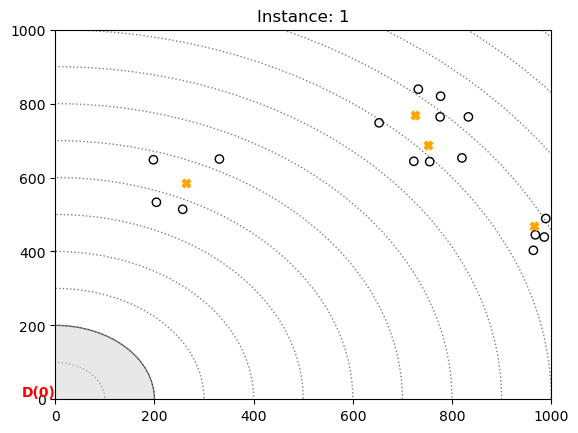

In [5]:
instance = 1
problem = problems[instance-1]
n_trips = problem['N_trips']
initial = initial_solution(problem,n_trips)
operators = [random_remove_greedy_insert,largest_trip_remove_greedy_insert,similarity_removal_greedy_insert,worst_removal_greedy_insert,smallest_trip_removal_greedy_insert,random_remove_kregret_insert,largest_trip_remove_kregret_insert,similarity_removal_kregret_insert,worst_removal_kregret_insert,smallest_trip_removal_kregret_insert,clustering_removal_kncs_greedy_insert,clustering_removal_krd_greedy_insert,clustering_removal_kncs_kregret_insert,clustering_removal_krd_kregret_insert]
weights = [1/4,1/4,1/4,1/16,1/16]
show_the_map(problem, title = instance,save_ = False, save_name = "/Users/simonhusebo/Dokumenter/MASTERS CODE/figures/instance"+str(instance)+".png")


In [6]:
best_solution,processed_best,best_cost,best_costs,costs,all_weights,all_scores,all_used,final_improvement,unique,accept_list, deltas = ALNS(initial,problem,operators,5000)

Starting ALNS
Initial solution: ([(0, 0), (0, 0), (0, 0), (0, 0), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1)], [], [])
Initial cost: 167500
Iteration 0
Iteration 1000
Escape at 1809
Iteration 2000
Iteration 3000
Escape at 3310
Iteration 4000
Escape at 4834
Best cost: 66122.875


In [59]:
#with open('5k_n10_all30.pkl', 'wb') as file:
#    pickle.dump(results, file)

with open('/Users/simonhusebo/Dokumenter/MASTERS CODE/results/5k_n10_all30.pkl', 'rb') as file:
    results = pickle.load(file)
keys = results.keys()

instance = 30
problem = problems[instance-1]
processed_best = results[instance][0]
cost = results[instance][3]
best_cost = results[instance][4]
avg_best = results[instance][5]
print(avg_best)

[3246000.0, 3058886.7149999994, 2920538.6595, 2906556.2705000006, 2591794.9795, 2492165.151, 2480349.592, 2463481.743, 2449806.0204999996, 2435946.009, 2417035.914, 2400229.528, 2382135.766, 2359048.154, 2350837.1119999997, 2333379.8099999996, 2321390.6515, 2313089.5225, 2298703.4325, 2285247.3935, 2189553.4345, 2186232.482, 2166959.0345, 2145323.336, 2140070.9469999997, 2137464.431, 2130896.8199999994, 2119704.6829999997, 2107888.0305, 2105244.4390000002, 2093526.2595000002, 2081386.934, 2033792.991, 1929457.424, 1914089.836, 1899722.8195, 1886947.5484999996, 1874890.2585, 1847834.0059999998, 1828195.7349999999, 1817361.0250000004, 1798064.3560000001, 1694571.572, 1689069.5745, 1687742.2314999998, 1687089.9164999998, 1685439.9485000004, 1682306.7215, 1676586.83, 1672194.7610000004, 1669321.7715000003, 1668661.7345000003, 1664092.4280000005, 1658175.0645000003, 1658161.4040000003, 1657231.2655000002, 1656512.3235000002, 1655402.9535, 1654541.698, 1654497.8735000002, 1652154.8790000004,

In [148]:
def zoomed_plot_(data, x_min, x_max, save=False, save_name='zoomed_plot.png', data2=None):
    fig, ax = plt.subplots(figsize=(24, 14))
    
    ax.plot(data, color='blue')
    
    if data2:
        ax.plot(data2, color='red')
    
    ax.set_xlabel('Iteration', fontsize=22)
    ax.set_ylabel('Objective Value', fontsize=22)
    ax.set_ylim(min(data) * 0.9, max(data))
    
    
    
  
    # Create inset plot
    ax_inset = fig.add_axes([0.35, 0.35, 0.5, 0.5])
    ax_inset.plot(range(x_min, x_max), data[x_min:x_max], color='blue', linewidth=1)
    if data2:
        ax_inset.plot(range(x_min, x_max), data2[x_min:x_max], color='red', linewidth=1)
    
    ax_inset.set_ylim(min(data[x_min:x_max]), max(data[x_min:x_max]))
    ax_inset.set_xlim(x_min-10, x_max)
    
    
    #bbox = ax_inset.get_position()

    # Extract coordinates
    #scaled_bbox_x0 = bbox.x0 * len(data)
    #scaled_bbox_y0 = bbox.y0 * max(data)
    #scaled_bbox_x1 = bbox.x1 * len(data)
    #scaled_bbox_y1 = bbox.y1 * max(data)
    
    inset_min = min(data[x_min:x_max])
    inset_max = max(data[x_min:x_max])
    
    fig_x_min, fig_x_max = fig.gca().get_xlim()

    # Define scaling factors
    scaling_factor_x = len(data) / 100
    scaling_factor_y = (max(data)-min(data)) / 100

    # Line from x-axis at x_min to top-right corner of entire plot
    line1 = Line2D([0* scaling_factor_x, 27 * scaling_factor_x], [0 * scaling_factor_y+ min(data) * 0.9,min(data) * 0.9 +  33 * scaling_factor_y], linestyle='--', color='orange')

    # Line from x-axis at x_max to top-right corner of entire plot
    line2 = Line2D([10 * scaling_factor_x, 98 * scaling_factor_x], [min(data) * 0.9 + 0 * scaling_factor_y,min(data) * 0.9 +  33 * scaling_factor_y], linestyle='--', color='orange')

    # Line from y-axis at min(data[x_min:x_max]) to top-right corner of entire plot
    line3 = Line2D([fig_x_min-230, 27 * scaling_factor_x], [inset_min,min(data) * 0.9 +  33 * scaling_factor_y], linestyle='--', color='orange')

    # Line from y-axis at max(data[x_min:x_max]) to top-right corner of entire plot
    line4 = Line2D([fig_x_min-230, 27 * scaling_factor_x], [inset_max-5000,min(data) * 0.9 + 103 * scaling_factor_y], linestyle='--', color='orange')
            
    ax.add_line(line1)
    ax.add_line(line2)
    ax.add_line(line3)
    ax.add_line(line4)
    
    if data2:
        ax.set_title('Plot of the critical part of  the search. Best run (blue) Average run (red)', fontsize=22)
    else:
        ax.set_title('Plot of critical part of search', fontsize=22)
    
    if save:
        plt.savefig(save_name)
    
    plt.show()

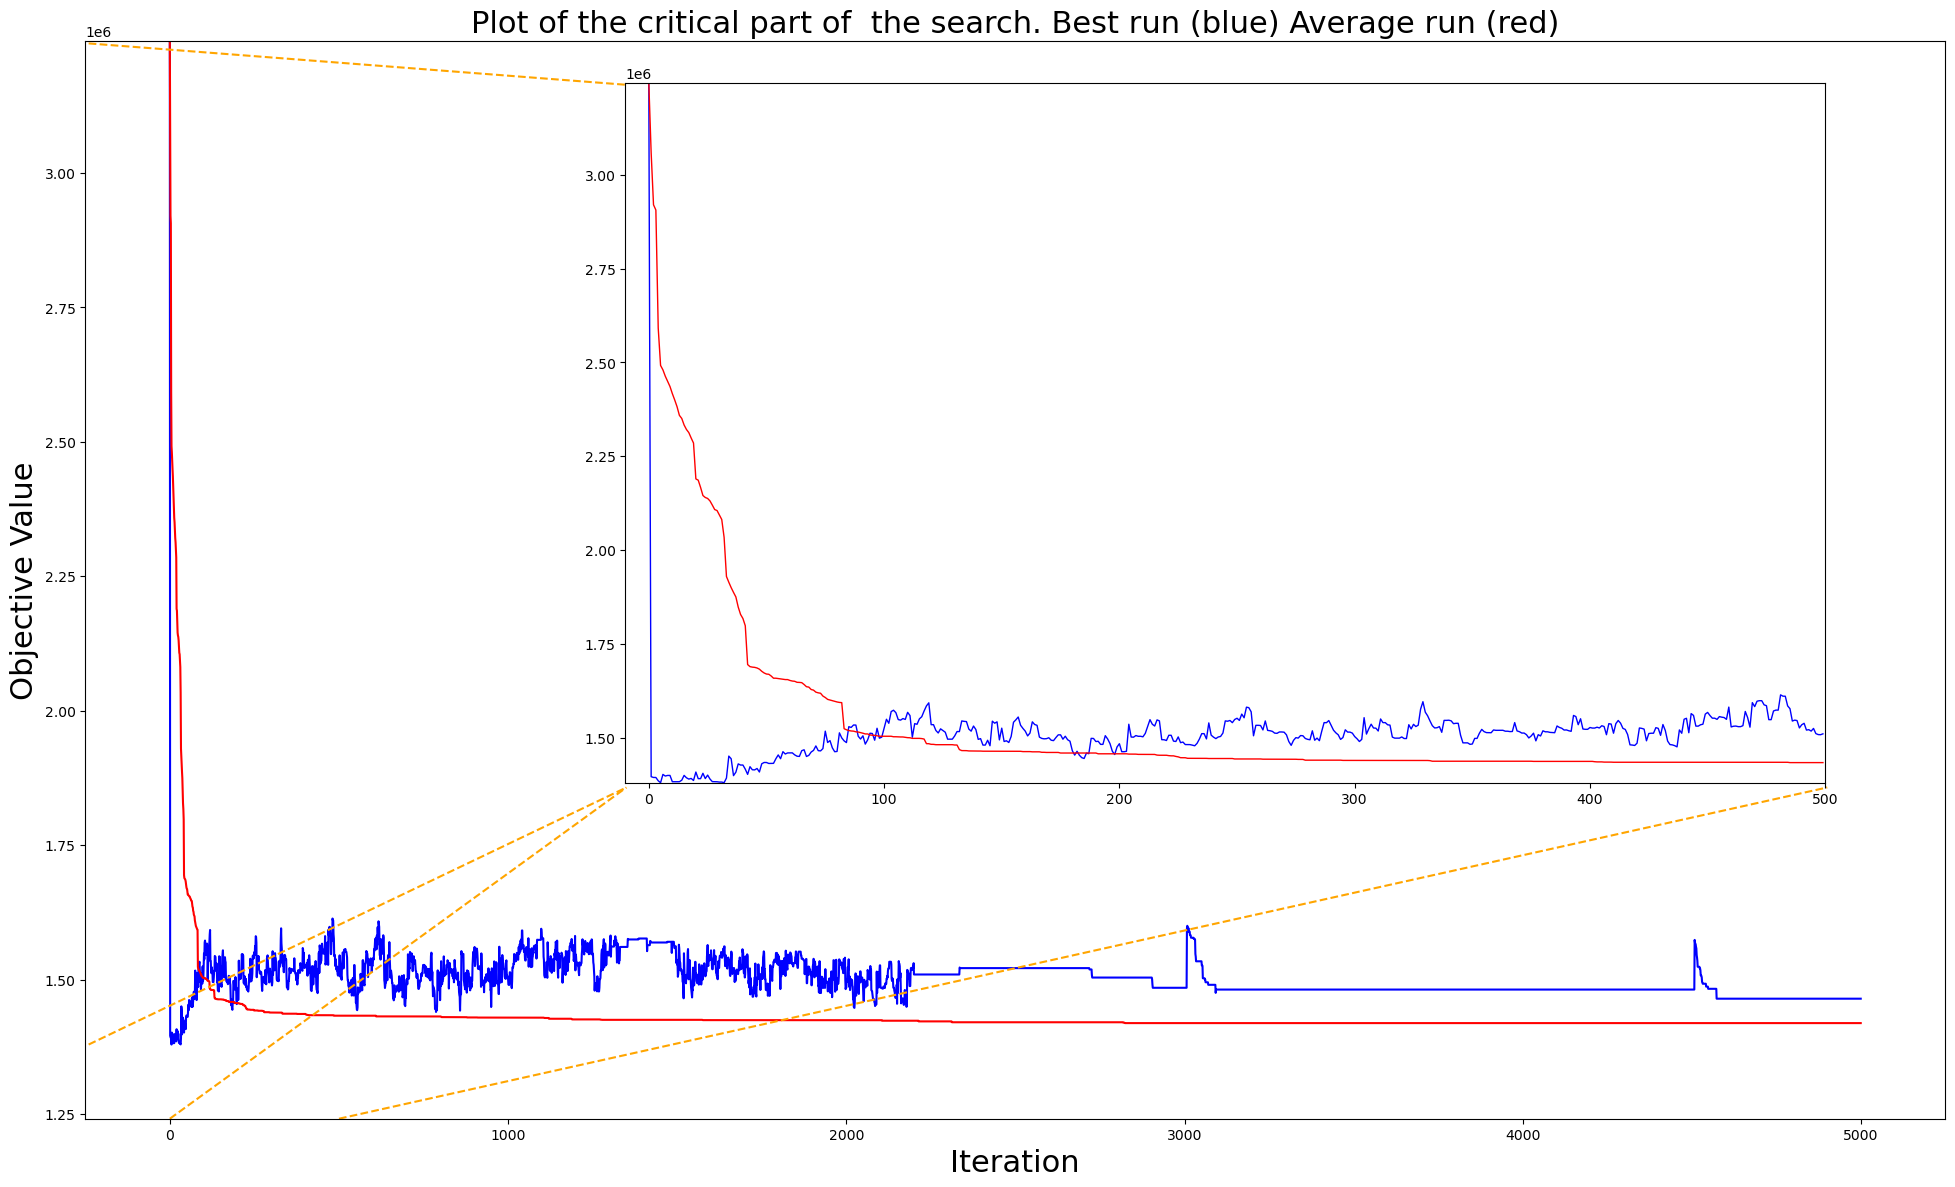

In [149]:
zoomed_plot_(cost, 0, 500, data2=avg_best)